# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
* There is no strong relationship between latitude or longitutde and wind speed.
* There is no strong relationship between latitude and cloudiness.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_weather = pd.DataFrame(cities, columns=["City"])
cities_weather["Cloudiness"] = ""
cities_weather["Country"] = ""
cities_weather["Date"] = ""
cities_weather["Humidity"] = ""
cities_weather["Lat"] = ""
cities_weather["Lng"] = ""
cities_weather["Max Temp"] = ""
cities_weather["Wind Speed"] = ""
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,,,,,,,,
1,albany,,,,,,,,
2,tateyama,,,,,,,,
3,lebu,,,,,,,,
4,vaini,,,,,,,,


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {
    "APPID": api_key,
    "units": "imperial"
}

for index, row in cities_weather.iterrows():
    city_name = row["City"]
    params["q"] = city_name
    
    response = requests.get(url, params=params).json()

    try:
        print(f"Processing Reocrd {index}| {city_name}.")
        
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]

    except (KeyError, IndexError):
        print("City not found ... skipping.")
        
    print("------------")

Processing Reocrd 0| new norfolk.
------------
Processing Reocrd 1| albany.
------------
Processing Reocrd 2| tateyama.
------------
Processing Reocrd 3| lebu.
------------
Processing Reocrd 4| vaini.
------------
Processing Reocrd 5| constitucion.
------------
Processing Reocrd 6| uirauna.
------------
Processing Reocrd 7| busselton.
------------
Processing Reocrd 8| calamar.
------------
Processing Reocrd 9| ushuaia.
------------
Processing Reocrd 10| qaanaaq.
------------
Processing Reocrd 11| castro.
------------
Processing Reocrd 12| cueto.
------------
Processing Reocrd 13| kavieng.
------------
Processing Reocrd 14| balabac.
------------
Processing Reocrd 15| mataura.
------------
Processing Reocrd 16| bonavista.
------------
Processing Reocrd 17| barrow.
------------
Processing Reocrd 18| sola.
------------
Processing Reocrd 19| bluff.
------------
Processing Reocrd 20| longyearbyen.
------------
Processing Reocrd 21| siverskiy.
------------
Processing Reocrd 22| punta arenas.


Processing Reocrd 169| evensk.
------------
Processing Reocrd 170| taolanaro.
City not found ... skipping.
------------
Processing Reocrd 171| fare.
------------
Processing Reocrd 172| paarl.
------------
Processing Reocrd 173| ternate.
------------
Processing Reocrd 174| auka.
------------
Processing Reocrd 175| khasan.
------------
Processing Reocrd 176| jaen.
------------
Processing Reocrd 177| pervomayskoye.
------------
Processing Reocrd 178| arraial do cabo.
------------
Processing Reocrd 179| liseleje.
------------
Processing Reocrd 180| torbay.
------------
Processing Reocrd 181| mahadday weyne.
City not found ... skipping.
------------
Processing Reocrd 182| kilmallock.
------------
Processing Reocrd 183| sakakah.
City not found ... skipping.
------------
Processing Reocrd 184| maningrida.
------------
Processing Reocrd 185| matagami.
------------
Processing Reocrd 186| alta floresta.
------------
Processing Reocrd 187| kaitangata.
------------
Processing Reocrd 188| saleaula.

Processing Reocrd 331| port hawkesbury.
------------
Processing Reocrd 332| salalah.
------------
Processing Reocrd 333| bosaso.
------------
Processing Reocrd 334| haines junction.
------------
Processing Reocrd 335| ahipara.
------------
Processing Reocrd 336| shenkursk.
------------
Processing Reocrd 337| teya.
------------
Processing Reocrd 338| ribeira grande.
------------
Processing Reocrd 339| fevralsk.
City not found ... skipping.
------------
Processing Reocrd 340| karratha.
------------
Processing Reocrd 341| srednekolymsk.
------------
Processing Reocrd 342| tres arroyos.
------------
Processing Reocrd 343| kuche.
City not found ... skipping.
------------
Processing Reocrd 344| mosquera.
------------
Processing Reocrd 345| walvis bay.
------------
Processing Reocrd 346| santa isabel do rio negro.
------------
Processing Reocrd 347| trinidad.
------------
Processing Reocrd 348| hofn.
------------
Processing Reocrd 349| galich.
------------
Processing Reocrd 350| kota belud.
-

Processing Reocrd 499| koungou.
City not found ... skipping.
------------
Processing Reocrd 500| alihe.
------------
Processing Reocrd 501| concarneau.
------------
Processing Reocrd 502| oriximina.
------------
Processing Reocrd 503| gijon.
------------
Processing Reocrd 504| sistranda.
------------
Processing Reocrd 505| severo-yeniseyskiy.
------------
Processing Reocrd 506| kuytun.
------------
Processing Reocrd 507| miri.
------------
Processing Reocrd 508| okhotsk.
------------
Processing Reocrd 509| gimbi.
------------
Processing Reocrd 510| champerico.
------------
Processing Reocrd 511| tsihombe.
City not found ... skipping.
------------
Processing Reocrd 512| wageningen.
------------
Processing Reocrd 513| fasa.
------------
Processing Reocrd 514| havre-saint-pierre.
------------
Processing Reocrd 515| uchiza.
------------
Processing Reocrd 516| bainbridge.
------------
Processing Reocrd 517| santa marta.
------------
Processing Reocrd 518| bandarbeyla.
------------
Processin

In [5]:
cities_weather.replace('', np.nan, inplace=True)
cities_clean = cities_weather.dropna(how="any")
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,75.0,AU,1.536887e+09,37.0,-42.78,147.06,66.20,13.87
1,albany,75.0,US,1.536886e+09,78.0,42.65,-73.75,73.04,2.30
2,tateyama,75.0,JP,1.536883e+09,94.0,36.66,137.31,71.60,3.36
3,lebu,20.0,ET,1.536887e+09,93.0,8.96,38.73,55.40,6.93
4,vaini,12.0,IN,1.536888e+09,87.0,15.34,74.49,59.53,1.63


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_clean.to_csv("Cities Weather Information.csv")
cities_clean.count()

City          522
Cloudiness    522
Country       522
Date          522
Humidity      522
Lat           522
Lng           522
Max Temp      522
Wind Speed    522
dtype: int64

In [7]:
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,75.0,AU,1.536887e+09,37.0,-42.78,147.06,66.20,13.87
1,albany,75.0,US,1.536886e+09,78.0,42.65,-73.75,73.04,2.30
2,tateyama,75.0,JP,1.536883e+09,94.0,36.66,137.31,71.60,3.36
3,lebu,20.0,ET,1.536887e+09,93.0,8.96,38.73,55.40,6.93
4,vaini,12.0,IN,1.536888e+09,87.0,15.34,74.49,59.53,1.63


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

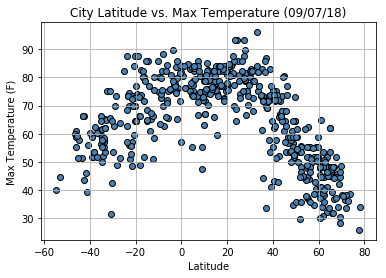

In [8]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Max Temp"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (09/07/18)")
plt.grid()

#### Latitude vs. Humidity Plot

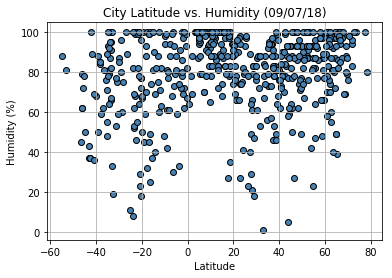

In [9]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Humidity"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (09/07/18)")
plt.grid()

#### Latitude vs. Cloudiness Plot

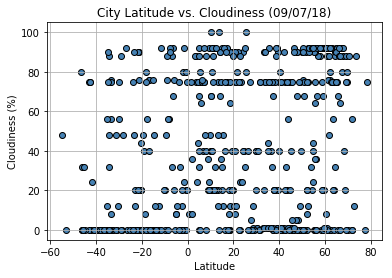

In [10]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Cloudiness"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (09/07/18)")
plt.grid()

#### Latitude vs. Wind Speed Plot

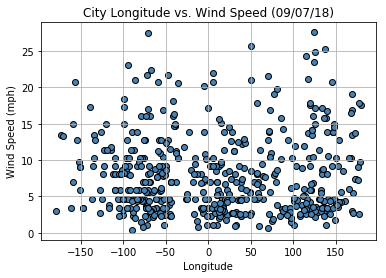

In [11]:
city_lat = cities_clean["Lng"]
city_temp = cities_clean["Wind Speed"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Longitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Longitude vs. Wind Speed (09/07/18)")
plt.grid()